In [2]:
import torch 

In [3]:
import torch.nn as nn
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline
import numpy as np

In [4]:
df = pd.read_csv('../Data/NYCTaxiFares.csv')

In [5]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1


In [6]:
df['fare_amount'].describe()

count    120000.000000
mean         10.040326
std           7.500134
min           2.500000
25%           5.700000
50%           7.700000
75%          11.300000
max          49.900000
Name: fare_amount, dtype: float64

In [7]:
def haversine_distance(df, lat1, long1, lat2, long2):
    """
    Calculates the haversine distance between 2 sets of GPS coordinates in df
    """
    r = 6371  # average radius of Earth in kilometers
       
    phi1 = np.radians(df[lat1])
    phi2 = np.radians(df[lat2])
    
    delta_phi = np.radians(df[lat2]-df[lat1])
    delta_lambda = np.radians(df[long2]-df[long1])
     
    a = np.sin(delta_phi/2)**2 + np.cos(phi1) * np.cos(phi2) * np.sin(delta_lambda/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    d = (r * c) # in kilometers

    return d

In [8]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count'],
      dtype='object')

In [9]:
df['dist_km'] = haversine_distance(df, 'pickup_latitude', 'pickup_longitude', 'dropoff_latitude', 'dropoff_longitude')

In [10]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56 UTC,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53 UTC,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26 UTC,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03 UTC,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01 UTC,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   pickup_datetime    120000 non-null  object 
 1   fare_amount        120000 non-null  float64
 2   fare_class         120000 non-null  int64  
 3   pickup_longitude   120000 non-null  float64
 4   pickup_latitude    120000 non-null  float64
 5   dropoff_longitude  120000 non-null  float64
 6   dropoff_latitude   120000 non-null  float64
 7   passenger_count    120000 non-null  int64  
 8   dist_km            120000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 8.2+ MB


In [12]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120000 entries, 0 to 119999
Data columns (total 9 columns):
 #   Column             Non-Null Count   Dtype              
---  ------             --------------   -----              
 0   pickup_datetime    120000 non-null  datetime64[ns, UTC]
 1   fare_amount        120000 non-null  float64            
 2   fare_class         120000 non-null  int64              
 3   pickup_longitude   120000 non-null  float64            
 4   pickup_latitude    120000 non-null  float64            
 5   dropoff_longitude  120000 non-null  float64            
 6   dropoff_latitude   120000 non-null  float64            
 7   passenger_count    120000 non-null  int64              
 8   dist_km            120000 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(6), int64(2)
memory usage: 8.2 MB


In [14]:
my_time = df['pickup_datetime'][0]

In [15]:
my_time.hour

8

In [16]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321


In [17]:
df['EDTdate'] = df['pickup_datetime'] - pd.Timedelta(hours = 4)
#daylight savings

In [18]:
df['Hour'] = df['EDTdate'].dt.hour

In [19]:
df['AMorPM'] = np.where(df['Hour']<12,'am','pm')

In [20]:
df['Weekday'] = df['EDTdate'].dt.strftime("%a")

In [21]:
df.head()

,pickup_datetime,fare_amount,fare_class,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,dist_km,EDTdate,Hour,AMorPM,Weekday
0,2010-04-19 08:17:56+00:00,6.5,0,-73.992365,40.730521,-73.975499,40.744746,1,2.126312,2010-04-19 04:17:56+00:00,4,am,Mon
1,2010-04-17 15:43:53+00:00,6.9,0,-73.990078,40.740558,-73.974232,40.744114,1,1.392307,2010-04-17 11:43:53+00:00,11,am,Sat
2,2010-04-17 11:23:26+00:00,10.1,1,-73.994149,40.751118,-73.960064,40.766235,2,3.326763,2010-04-17 07:23:26+00:00,7,am,Sat
3,2010-04-11 21:25:03+00:00,8.9,0,-73.990485,40.756422,-73.971205,40.748192,1,1.864129,2010-04-11 17:25:03+00:00,17,pm,Sun
4,2010-04-17 02:19:01+00:00,19.7,1,-73.990976,40.734202,-73.905956,40.743115,1,7.231321,2010-04-16 22:19:01+00:00,22,pm,Fri


In [22]:
df.columns

Index(['pickup_datetime', 'fare_amount', 'fare_class', 'pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km', 'EDTdate', 'Hour', 'AMorPM', 'Weekday'],
      dtype='object')

In [23]:
cat_cols=['Hour','AMorPM','Weekday']
cont_cols = ['pickup_longitude',
       'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude',
       'passenger_count', 'dist_km']

In [24]:
y_col = ['fare_amount']

In [25]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                               int32
AMorPM                            object
Weekday                           object
dtype: object

In [26]:
for cat in cat_cols: 
    df[cat] = df[cat].astype('category')

In [27]:
df.dtypes

pickup_datetime      datetime64[ns, UTC]
fare_amount                      float64
fare_class                         int64
pickup_longitude                 float64
pickup_latitude                  float64
dropoff_longitude                float64
dropoff_latitude                 float64
passenger_count                    int64
dist_km                          float64
EDTdate              datetime64[ns, UTC]
Hour                            category
AMorPM                          category
Weekday                         category
dtype: object

In [28]:
df['Hour'].head()

0     4
1    11
2     7
3    17
4    22
Name: Hour, dtype: category
Categories (24, int32): [0, 1, 2, 3, ..., 20, 21, 22, 23]

In [29]:
df['AMorPM'].head()

0    am
1    am
2    am
3    pm
4    pm
Name: AMorPM, dtype: category
Categories (2, object): ['am', 'pm']

In [30]:
df['Weekday'].head()

0    Mon
1    Sat
2    Sat
3    Sun
4    Fri
Name: Weekday, dtype: category
Categories (7, object): ['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed']

In [31]:
 df['AMorPM'].cat.codes

0         0
1         0
2         0
3         1
4         1
         ..
119995    0
119996    0
119997    1
119998    0
119999    1
Length: 120000, dtype: int8

In [32]:
 df['Weekday'].cat.categories

Index(['Fri', 'Mon', 'Sat', 'Sun', 'Thu', 'Tue', 'Wed'], dtype='object')

In [33]:
 df['Weekday'].cat.codes.values

array([1, 2, 2, ..., 3, 5, 2], dtype=int8)

In [34]:
hr = df['Hour'].cat.codes.values
ampm = df['AMorPM'].cat.codes.values
wkdy = df['Weekday'].cat.codes.values

In [35]:
hr

array([ 4, 11,  7, ..., 14,  4, 12], dtype=int8)

In [36]:
cats = np.stack([hr,ampm,wkdy], axis = 1)

In [37]:
cats

array([[ 4,  0,  1],
       [11,  0,  2],
       [ 7,  0,  2],
       ...,
       [14,  1,  3],
       [ 4,  0,  5],
       [12,  1,  2]], dtype=int8)

In [38]:
cats = torch.tensor(cats, dtype = torch.int64)

In [39]:
conts = np.stack([df[col].values for col in cont_cols], 1)

In [40]:
print(df[cont_cols].dtypes)

pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dist_km              float64
dtype: object


In [41]:
conts

array([[-73.992365  ,  40.730521  , -73.975499  ,  40.744746  ,
          1.        ,   2.12631159],
       [-73.990078  ,  40.740558  , -73.974232  ,  40.744114  ,
          1.        ,   1.39230687],
       [-73.994149  ,  40.751118  , -73.960064  ,  40.766235  ,
          2.        ,   3.32676344],
       ...,
       [-73.988574  ,  40.749772  , -74.011541  ,  40.707799  ,
          3.        ,   5.05252282],
       [-74.004449  ,  40.724529  , -73.992697  ,  40.730765  ,
          1.        ,   1.20892296],
       [-73.955415  ,  40.77192   , -73.967623  ,  40.763015  ,
          3.        ,   1.42739869]])

In [42]:
conts = torch.tensor(conts, dtype=torch.float)

In [43]:
conts

tensor([[-73.9924,  40.7305, -73.9755,  40.7447,   1.0000,   2.1263],
        [-73.9901,  40.7406, -73.9742,  40.7441,   1.0000,   1.3923],
        [-73.9941,  40.7511, -73.9601,  40.7662,   2.0000,   3.3268],
        ...,
        [-73.9886,  40.7498, -74.0115,  40.7078,   3.0000,   5.0525],
        [-74.0044,  40.7245, -73.9927,  40.7308,   1.0000,   1.2089],
        [-73.9554,  40.7719, -73.9676,  40.7630,   3.0000,   1.4274]])

In [44]:
y = torch.tensor(df[y_col].values, dtype = torch.float)

In [45]:
cats.shape

torch.Size([120000, 3])

In [46]:
conts.shape

torch.Size([120000, 6])

In [47]:
y.shape

torch.Size([120000, 1])

In [48]:
cat_szs = [len(df[col].cat.categories) for col in cat_cols]

In [49]:
cat_szs

[24, 2, 7]

In [50]:
emb_szs = [(size,min(50,(size+1)//2)) for size in cat_szs]

In [51]:
emb_szs

[(24, 12), (2, 1), (7, 4)]

In [52]:
catz = cats[:2] 

In [53]:
catz

tensor([[ 4,  0,  1],
        [11,  0,  2]])

In [54]:
selfembeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])

In [55]:
selfembeds

ModuleList(
  (0): Embedding(24, 12)
  (1): Embedding(2, 1)
  (2): Embedding(7, 4)
)

In [56]:
embeddingz = []

for i,e in enumerate(selfembeds): 
    embeddingz.append(e(catz[:,i]))

In [57]:
embeddingz

[tensor([[ 1.7223,  2.2781, -1.1569,  3.2126,  0.1148,  0.0596,  0.8144, -3.5766,
           0.1667,  1.3708,  0.6196, -1.3170],
         [-1.3287, -1.3629, -0.3983,  0.4681,  1.2893, -1.0518,  0.5555,  0.6102,
           0.4282, -0.7093,  0.1222,  0.3238]], grad_fn=<EmbeddingBackward0>),
 tensor([[-0.0208],
         [-0.0208]], grad_fn=<EmbeddingBackward0>),
 tensor([[ 0.0677,  0.5597,  0.6322,  0.4760],
         [ 0.0659,  1.3040,  0.3542, -0.4145]], grad_fn=<EmbeddingBackward0>)]

In [58]:
z = torch.cat(embeddingz, 1)

In [59]:
selfembdrop = nn.Dropout(0.4)

In [60]:
z = selfembdrop(z)

In [61]:
z

tensor([[ 0.0000,  0.0000, -1.9281,  0.0000,  0.0000,  0.0993,  1.3573, -0.0000,
          0.2778,  2.2846,  1.0327, -2.1950, -0.0347,  0.1129,  0.0000,  0.0000,
          0.0000],
        [-0.0000, -0.0000, -0.0000,  0.0000,  0.0000, -1.7530,  0.0000,  0.0000,
          0.0000, -0.0000,  0.0000,  0.5396, -0.0347,  0.0000,  2.1733,  0.5903,
         -0.0000]], grad_fn=<MulBackward0>)

In [62]:
class TabularModel(nn.Module): 
    def __init__(self,emb_szs, n_cont, out_sz, layers, p=0.5):
        super().__init__()
        self.embeds = nn.ModuleList([nn.Embedding(ni,nf) for ni,nf in emb_szs])
        self.emb_drop = nn.Dropout(p)
        self.bn_cont = nn.BatchNorm1d(n_cont)
        layerlist = []
        n_emb = sum([nf for ni,nf in emb_szs])
        n_in = n_emb + n_cont


        for i in layers: 
            layerlist.append(nn.Linear(n_in, i))
            layerlist.append(nn.ReLU(inplace = True))
            layerlist.append(nn.BatchNorm1d(i))
            layerlist.append(nn.Dropout(p))
            n_in = i
        layerlist.append(nn.Linear(layers[-1],out_sz))
        self.layers = nn.Sequential(*layerlist)

    def forward(self, x_cat, x_cont): 
        embeddings = []
        for i,e in enumerate(self.embeds): 
            embeddings.append(e(x_cat[:,i]))
        x = torch.cat(embeddings,1)
        x = self.emb_drop(x)

        x_cont = self.bn_cont(x_cont)
        x = torch.cat([x,x_cont],1)
        x = self.layers(x)
        return x

In [63]:
torch.manual_seed(33)
model = TabularModel(emb_szs, conts.shape[1],1,[200,100],p=0.4)

In [64]:
model

TabularModel(
  (embeds): ModuleList(
    (0): Embedding(24, 12)
    (1): Embedding(2, 1)
    (2): Embedding(7, 4)
  )
  (emb_drop): Dropout(p=0.4, inplace=False)
  (bn_cont): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=23, out_features=200, bias=True)
    (1): ReLU(inplace=True)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4, inplace=False)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace=True)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4, inplace=False)
    (8): Linear(in_features=100, out_features=1, bias=True)
  )
)

In [65]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)

In [66]:
batch_size = 60000
test_size = int(batch_size*0.2)
cat_train = cats[:batch_size - test_size]
cat_test = cats[batch_size - test_size:batch_size]
con_train = conts[:batch_size - test_size]
con_test = conts[batch_size - test_size:batch_size]

In [67]:
y_train = y[:batch_size - test_size]
y_test = y[batch_size - test_size:batch_size]

In [68]:
len(cat_train)

48000

In [69]:
len(con_train)

48000

In [70]:
import time 

start_time = time.time()

epochs = 300

losses = []

for i in range(epochs): 
    i+=1
    y_pred = model(cat_train, con_train)
    loss = torch.sqrt(criterion(y_pred,y_train))
    losses.append(loss.item())

    if i%10 == 1: 
        print(f'epoch {i} loss is {loss}')

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
duration = time.time() - start_time
print(f'training took {duration/60} minutes')

epoch 1 loss is 12.586895942687988
epoch 11 loss is 11.686630249023438
epoch 21 loss is 11.12125301361084
epoch 31 loss is 10.733585357666016
epoch 41 loss is 10.460502624511719
epoch 51 loss is 10.234928131103516
epoch 61 loss is 10.02804946899414
epoch 71 loss is 9.849165916442871
epoch 81 loss is 9.635119438171387
epoch 91 loss is 9.413426399230957
epoch 101 loss is 9.172722816467285
epoch 111 loss is 8.894369125366211
epoch 121 loss is 8.578489303588867
epoch 131 loss is 8.216472625732422
epoch 141 loss is 7.807892799377441
epoch 151 loss is 7.365025520324707
epoch 161 loss is 6.9186835289001465
epoch 171 loss is 6.455318450927734
epoch 181 loss is 5.966862201690674
epoch 191 loss is 5.46073579788208
epoch 201 loss is 5.016748428344727
epoch 211 loss is 4.6296257972717285
epoch 221 loss is 4.340892314910889
epoch 231 loss is 4.097135066986084
epoch 241 loss is 3.9073314666748047
epoch 251 loss is 3.8843047618865967
epoch 261 loss is 3.799872875213623
epoch 271 loss is 3.79858565330

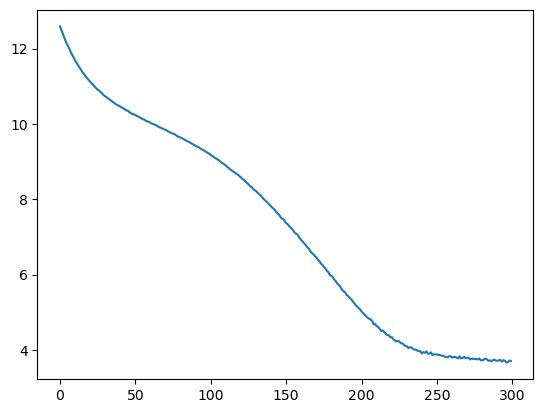

In [141]:
plt.plot(range(epochs),losses)

In [147]:
with torch.no_grad(): 
    y_val = model(cat_test, con_test)
    loss = torch.sqrt(criterion(y_val, y_test))

In [157]:
for i in range(10): 
    print(f'{i}.) PREDICTED: {y_val[i].item()} TRUE: {y_test[i].item()}')

0.) PREDICTED: 5.476497650146484 TRUE: 2.9000000953674316
1.) PREDICTED: 13.299205780029297 TRUE: 5.699999809265137
2.) PREDICTED: 8.024120330810547 TRUE: 7.699999809265137
3.) PREDICTED: 14.611696243286133 TRUE: 12.5
4.) PREDICTED: 7.10632848739624 TRUE: 4.099999904632568
5.) PREDICTED: 6.12736177444458 TRUE: 5.300000190734863
6.) PREDICTED: 2.0009522438049316 TRUE: 3.700000047683716
7.) PREDICTED: 18.92991828918457 TRUE: 14.5
8.) PREDICTED: 5.278804302215576 TRUE: 5.699999809265137
9.) PREDICTED: 13.857450485229492 TRUE: 10.100000381469727


In [159]:
torch.save(model.state_dict(), 'TaxiModel.pt')